In [1]:
from prophet import Prophet as proph

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
PORTFOLIO = 'BTC-USD'
start = '2016-01-01'
end = '2021-09-1'


In [6]:
dataset = pd.DataFrame(yf.download(PORTFOLIO, start=start, end=end).ffill().dropna())


[*********************100%***********************]  1 of 1 completed


In [7]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [8]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-27,46894.554688,49112.785156,46394.281250,49058.667969,49058.667969,34511076995
2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,28568103401
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,25889650240
2021-08-30,48834.851562,48925.605469,46950.273438,47054.984375,47054.984375,31847007016
2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,34730363427


In [9]:
dataset['ds'] = dataset.index


In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
final_dataset = dataset[["ds","Close"]]
final_dataset.reset_index(drop=True, inplace=True)

In [12]:
final_dataset.head()

,ds,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


In [13]:
# Renaming the columns for use in FB prophet
final_dataset.rename(columns={'Close': 'y'}, inplace=True)

/var/folders/4b/l73ksqn90ls5dx9x6n2k93xc0000gn/T/ipykernel_24501/2425222836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.rename(columns={'Close': 'y'}, inplace=True)


In [14]:
final_dataset.head()

,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


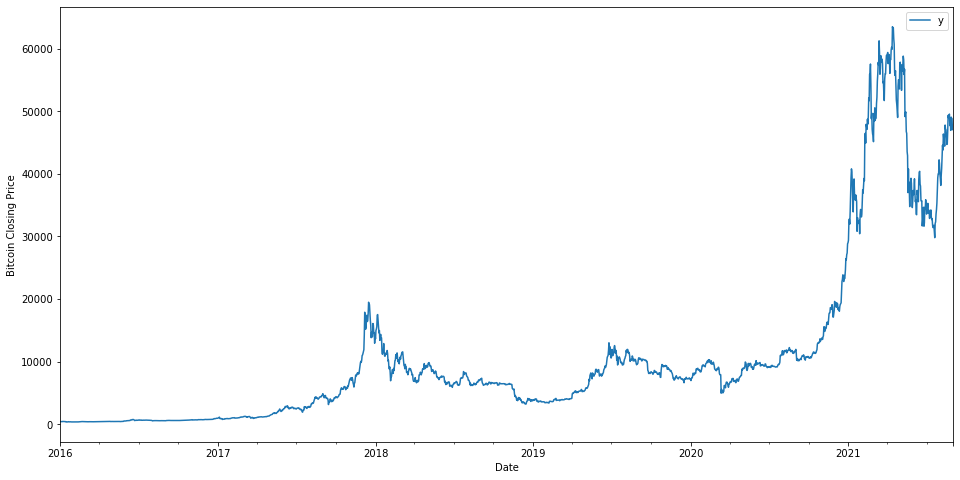

In [15]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = final_dataset.set_index('ds').plot(figsize=(16,8))
ax.set_ylabel('Bitcoin Closing Price')
ax.set_xlabel('Date')

plt.show()

In [16]:
final_dataset.describe()

,y
count,2070.000000
mean,10626.681495
std,13509.206082
min,364.330994
25%,2276.674927
50%,7035.215088
75%,10365.809814
max,63503.457031


In [15]:
final_dataset

,ds,y
0,2015-12-31,430.566986
1,2016-01-01,434.334015
2,2016-01-02,433.437988
3,2016-01-03,430.010986
4,2016-01-04,433.091003
...,...,...
2062,2021-08-27,49058.667969
2063,2021-08-28,48902.402344
2064,2021-08-29,48829.832031
2065,2021-08-30,47054.984375


,ds,y
0,2015-12-31,430.566986
1,2016-01-01,434.334015
2,2016-01-02,433.437988
3,2016-01-03,430.010986
4,2016-01-04,433.091003
...,...,...
2062,2021-08-27,49058.667969
2063,2021-08-28,48902.402344
2064,2021-08-29,48829.832031
2065,2021-08-30,47054.984375


In [16]:

final_dataset

,ds,y
0,2015-12-31,430.566986
1,2016-01-01,434.334015
2,2016-01-02,433.437988
3,2016-01-03,430.010986
4,2016-01-04,433.091003
...,...,...
2062,2021-08-27,49058.667969
2063,2021-08-28,48902.402344
2064,2021-08-29,48829.832031
2065,2021-08-30,47054.984375


,ds,y
0,2015-12-31,430.566986
1,2016-01-01,434.334015
2,2016-01-02,433.437988
3,2016-01-03,430.010986
4,2016-01-04,433.091003
...,...,...
2062,2021-08-27,49058.667969
2063,2021-08-28,48902.402344
2064,2021-08-29,48829.832031
2065,2021-08-30,47054.984375


In [17]:
# Fitting and training
mod = proph(interval_width=0.95, growth = 'linear', daily_seasonality=False, 
            seasonality_mode = 'multiplicative').add_seasonality(name='daily',period=1,fourier_order=15)
mod.fit(final_dataset)

In [18]:
future = mod.make_future_dataframe(periods=61, freq='D')

future.tail()
future['floor']=0

In [19]:
forecast = mod.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-12-31,313.255957,-2625.043088,3308.875180
1,2016-01-01,321.020332,-2593.746804,3128.974109
2,2016-01-02,325.908450,-2732.428535,3097.939699
3,2016-01-03,329.852671,-2746.404739,3279.736657
4,2016-01-04,333.852254,-2421.972344,3218.583452
...,...,...,...,...
2123,2021-10-27,37549.245368,34329.374208,41308.507725
2124,2021-10-28,37651.621217,33965.110332,41189.773245
2125,2021-10-29,38346.585362,34651.109344,41896.987086
2126,2021-10-30,38515.333973,34984.206101,42519.563378


,ds,yhat,yhat_lower,yhat_upper
0,2015-12-31,313.255957,-2625.043088,3308.875180
1,2016-01-01,321.020332,-2593.746804,3128.974109
2,2016-01-02,325.908450,-2732.428535,3097.939699
3,2016-01-03,329.852671,-2746.404739,3279.736657
4,2016-01-04,333.852254,-2421.972344,3218.583452
...,...,...,...,...
2123,2021-10-27,37549.245368,34329.374208,41308.507725
2124,2021-10-28,37651.621217,33965.110332,41189.773245
2125,2021-10-29,38346.585362,34651.109344,41896.987086
2126,2021-10-30,38515.333973,34984.206101,42519.563378


Blue line = Forecasted values
Black dots = Observed (actual) values
Blue-shaded region = Uncertainty intervals# 

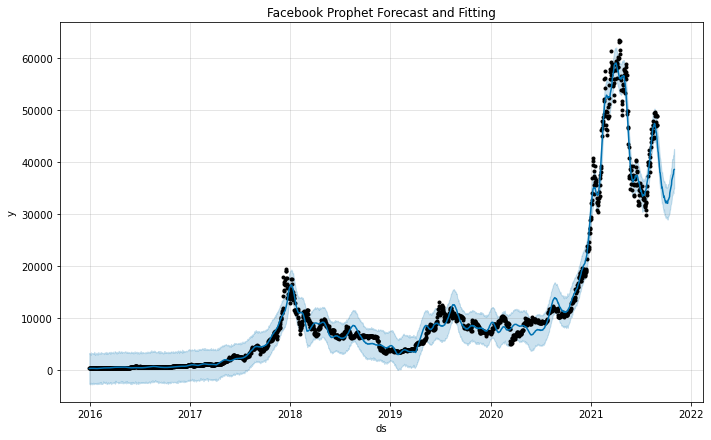

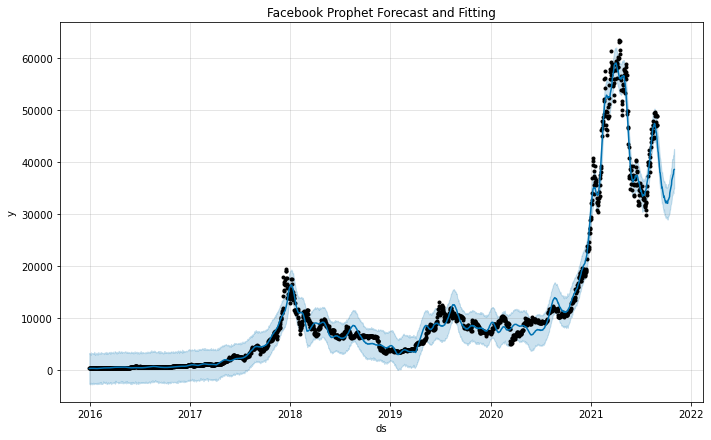

In [20]:
mod.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting')
plt.show()

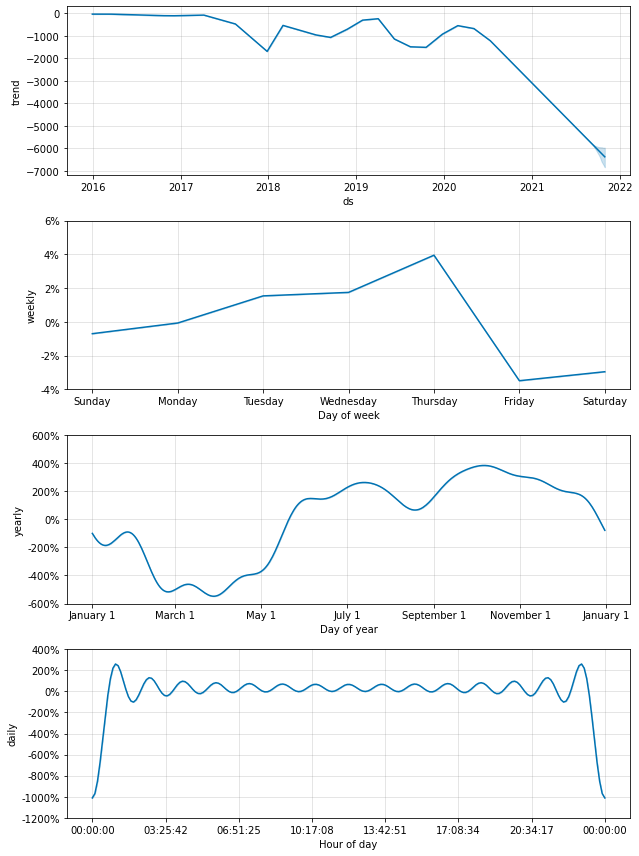

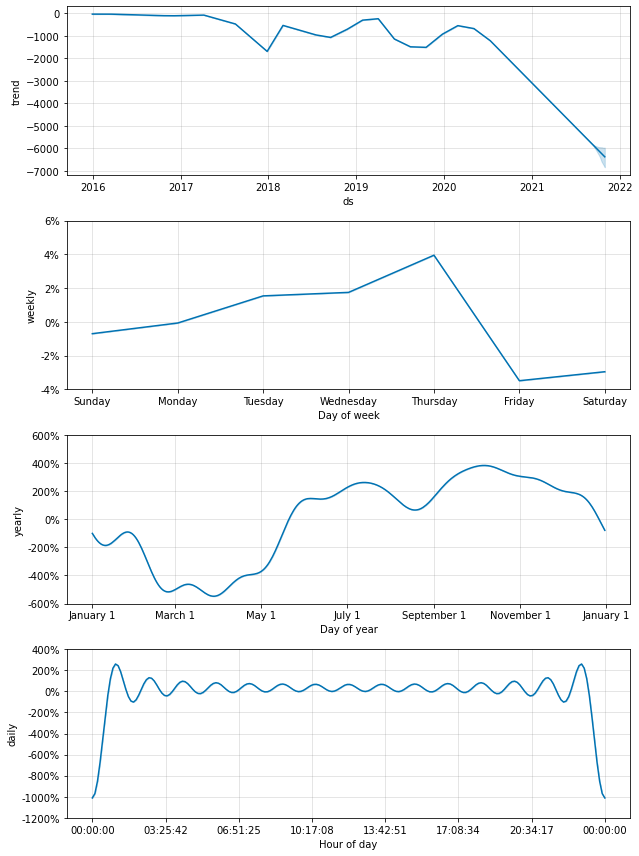

In [21]:
mod.plot_components(forecast)
plt.show()


In [22]:
PORTFOLIO = 'BTC-USD'
actual_start = '2021-09-02'
actual_end = '2021-11-1'


In [23]:
actual_data = pd.DataFrame(yf.download(PORTFOLIO, start=actual_start, end=actual_end).ffill().dropna())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
actual_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125
2021-09-02,48807.847656,50343.421875,48652.320312,49327.722656,49327.722656,39508070319
2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619
2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794
2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125
2021-09-02,48807.847656,50343.421875,48652.320312,49327.722656,49327.722656,39508070319
2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619
2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794
2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319


In [25]:
actual_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893
2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247
2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767
2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616
2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,61318.957031,32241199927


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893
2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247
2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767
2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616
2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,61318.957031,32241199927


In [26]:
actual_data['ds'] = actual_data.index

In [27]:
actual_data = actual_data[["ds","Close"]]
actual_data.reset_index(drop=True, inplace=True)

In [28]:
actual_data.head()

,ds,Close
0,2021-09-01,48847.027344
1,2021-09-02,49327.722656
2,2021-09-03,50025.375000
3,2021-09-04,49944.625000
4,2021-09-05,51753.410156


,ds,Close
0,2021-09-01,48847.027344
1,2021-09-02,49327.722656
2,2021-09-03,50025.375000
3,2021-09-04,49944.625000
4,2021-09-05,51753.410156


In [29]:
check2 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [30]:
compare = pd.merge(actual_data,check2)

In [31]:
compare.head()

,ds,Close,yhat,yhat_lower,yhat_upper
0,2021-09-01,48847.027344,42725.920093,39843.340548,45276.336874
1,2021-09-02,49327.722656,42008.092024,39152.096311,44942.592590
2,2021-09-03,50025.375000,41838.218283,39008.659492,44923.283350
3,2021-09-04,49944.625000,41209.946786,38353.679080,43967.824985
4,2021-09-05,51753.410156,40487.221858,37744.064970,43250.152532


,ds,Close,yhat,yhat_lower,yhat_upper
0,2021-09-01,48847.027344,42725.920093,39843.340548,45276.336874
1,2021-09-02,49327.722656,42008.092024,39152.096311,44942.592590
2,2021-09-03,50025.375000,41838.218283,39008.659492,44923.283350
3,2021-09-04,49944.625000,41209.946786,38353.679080,43967.824985
4,2021-09-05,51753.410156,40487.221858,37744.064970,43250.152532


In [32]:
compare = compare.rename(columns={'Close': 'Actual_Close','yhat': 'Projected_Close','yhat_lower' : 'Projected_Close_lower','yhat_upper' : 'Projected_Close_upper' })

In [33]:
compare.head()

,ds,Actual_Close,Projected_Close,Projected_Close_lower,Projected_Close_upper
0,2021-09-01,48847.027344,42725.920093,39843.340548,45276.336874
1,2021-09-02,49327.722656,42008.092024,39152.096311,44942.592590
2,2021-09-03,50025.375000,41838.218283,39008.659492,44923.283350
3,2021-09-04,49944.625000,41209.946786,38353.679080,43967.824985
4,2021-09-05,51753.410156,40487.221858,37744.064970,43250.152532


,ds,Actual_Close,Projected_Close,Projected_Close_lower,Projected_Close_upper
0,2021-09-01,48847.027344,42725.920093,39843.340548,45276.336874
1,2021-09-02,49327.722656,42008.092024,39152.096311,44942.592590
2,2021-09-03,50025.375000,41838.218283,39008.659492,44923.283350
3,2021-09-04,49944.625000,41209.946786,38353.679080,43967.824985
4,2021-09-05,51753.410156,40487.221858,37744.064970,43250.152532


In [34]:
compare["Session_Delta"] = compare.Actual_Close - compare.Projected_Close
compare

,ds,Actual_Close,Projected_Close,Projected_Close_lower,Projected_Close_upper,Session_Delta
0,2021-09-01,48847.027344,42725.920093,39843.340548,45276.336874,6121.107250
1,2021-09-02,49327.722656,42008.092024,39152.096311,44942.592590,7319.630632
2,2021-09-03,50025.375000,41838.218283,39008.659492,44923.283350,8187.156717
3,2021-09-04,49944.625000,41209.946786,38353.679080,43967.824985,8734.678214
4,2021-09-05,51753.410156,40487.221858,37744.064970,43250.152532,11266.188299
...,...,...,...,...,...,...
56,2021-10-27,58482.386719,37549.245368,34329.374208,41308.507725,20933.141351
57,2021-10-28,60622.136719,37651.621217,33965.110332,41189.773245,22970.515501
58,2021-10-29,62227.964844,38346.585362,34651.109344,41896.987086,23881.379482
59,2021-10-30,61888.832031,38515.333973,34984.206101,42519.563378,23373.498058


,ds,Actual_Close,Projected_Close,Projected_Close_lower,Projected_Close_upper,Session_Delta
0,2021-09-01,48847.027344,42725.920093,39843.340548,45276.336874,6121.107250
1,2021-09-02,49327.722656,42008.092024,39152.096311,44942.592590,7319.630632
2,2021-09-03,50025.375000,41838.218283,39008.659492,44923.283350,8187.156717
3,2021-09-04,49944.625000,41209.946786,38353.679080,43967.824985,8734.678214
4,2021-09-05,51753.410156,40487.221858,37744.064970,43250.152532,11266.188299
...,...,...,...,...,...,...
56,2021-10-27,58482.386719,37549.245368,34329.374208,41308.507725,20933.141351
57,2021-10-28,60622.136719,37651.621217,33965.110332,41189.773245,22970.515501
58,2021-10-29,62227.964844,38346.585362,34651.109344,41896.987086,23881.379482
59,2021-10-30,61888.832031,38515.333973,34984.206101,42519.563378,23373.498058


In [35]:
compare.Session_Delta.describe()

count       61.000000
mean     16581.251424
std       7463.790014
min       6121.107250
25%       9390.727735
50%      15292.423005
75%      23373.498058
max      30606.421356
Name: Session_Delta, dtype: float64

count       61.000000
mean     16581.251424
std       7463.790014
min       6121.107250
25%       9390.727735
50%      15292.423005
75%      23373.498058
max      30606.421356
Name: Session_Delta, dtype: float64

In [36]:
compare['ds'] = compare['ds'].dt.date

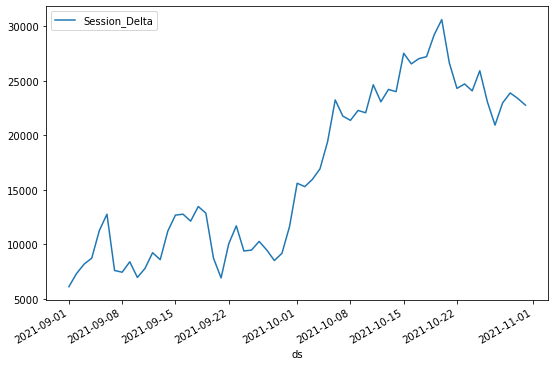

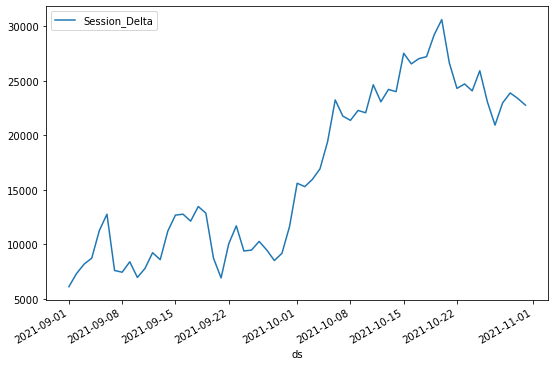

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))
compare.plot("ds", "Session_Delta", ax=ax)
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right');

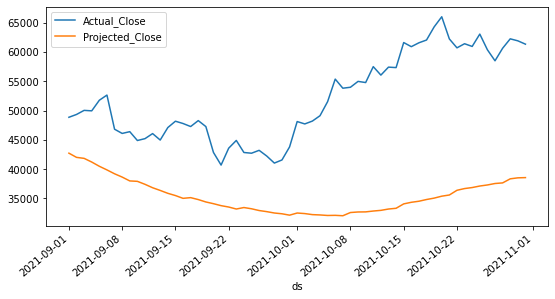

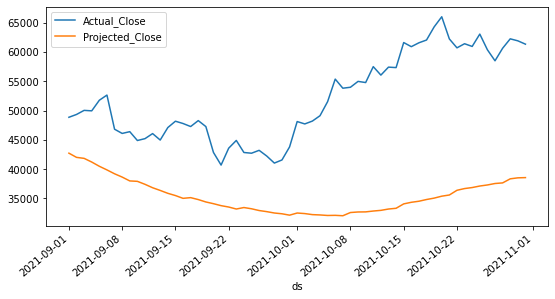

In [38]:
fig, ax = plt.subplots(figsize=(9, 8))
compare.plot('ds',['Actual_Close','Projected_Close'],ax=ax)
fig.autofmt_xdate(bottom=0.5, rotation=40, ha='right');


In [43]:
actual = compare['Actual_Close']
actual

0     48847.027344
1     49327.722656
2     50025.375000
3     49944.625000
4     51753.410156
          ...     
56    58482.386719
57    60622.136719
58    62227.964844
59    61888.832031
60    61318.957031
Name: Actual_Close, Length: 61, dtype: float64

0     48847.027344
1     49327.722656
2     50025.375000
3     49944.625000
4     51753.410156
          ...     
56    58482.386719
57    60622.136719
58    62227.964844
59    61888.832031
60    61318.957031
Name: Actual_Close, Length: 61, dtype: float64

In [45]:
pred_result = compare['Projected_Close']
pred_result


0     42725.920093
1     42008.092024
2     41838.218283
3     41209.946786
4     40487.221858
          ...     
56    37549.245368
57    37651.621217
58    38346.585362
59    38515.333973
60    38555.571693
Name: Projected_Close, Length: 61, dtype: float64

0     42725.920093
1     42008.092024
2     41838.218283
3     41209.946786
4     40487.221858
          ...     
56    37549.245368
57    37651.621217
58    38346.585362
59    38515.333973
60    38555.571693
Name: Projected_Close, Length: 61, dtype: float64

In [48]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(actual, pred_result)
errors

16581.251423916066

16581.251423916066

In [ ]:
errors = list()
for i in range(len(expected)):
# calculate error
    err = (actual[i] - pred_result[i])**2
# store error
    errors.append(err)
# report error
    print('>%.1f, %.1f = %.3f' % (actual[i], pred_result[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()